In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
import xgboost as xgb
import lightgbm as lgb
import joblib
import os


In [9]:
df= pd.read_csv("E:/VaccineLedger/Backend/data/dropout_prediction_satara.csv")
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Convert date columns
df['Dose1_Date'] = pd.to_datetime(df['Dose1 Date'])
df['Dose2_Date'] = pd.to_datetime(df['Dose2 Date'])

Dataset loaded successfully!
Shape: (1000, 10)
Columns: ['Child ID', 'Gender', 'Age', 'Travel Time', 'Parent Education', 'Dose1 Date', 'Dose2 Date', 'Distance to Center', 'Delay_Days', 'Is_On_Time']


In [10]:
import pandas as pd
import numpy as np

print("\n" + "="*50)
print("ADVANCED EXPLORATORY DATA ANALYSIS")
print("="*50)

# Load your DataFrame here
# df = pd.read_csv("your_dataset.csv")  # Example
# Make sure `df` is defined

# 1. DATASET OVERVIEW
print("\n1. DATASET OVERVIEW")
print("-" * 30)
print(f"Dataset Shape: {df.shape}")
print(f"Memory Usage: {df.memory_usage().sum() / 1024:.2f} KB")
print("\nData Types:")
print(df.dtypes)


# 3. STATISTICAL SUMMARY
print("\n3. STATISTICAL SUMMARY")
print("-" * 30)
print(df.describe())

# 4. TARGET VARIABLE ANALYSIS
print("\n4. TARGET VARIABLE ANALYSIS")
print("-" * 30)
target_counts = df['Is_On_Time'].value_counts()
target_percent = df['Is_On_Time'].value_counts(normalize=True) * 100
print("Class Distribution:")
print(f"On Time (1): {target_counts.get(1, 0)} ({target_percent.get(1, 0):.1f}%)")
print(f"Delayed (0): {target_counts.get(0, 0)} ({target_percent.get(0, 0):.1f}%)")

# 5. CORRELATION ANALYSIS
print("\n5. CORRELATION ANALYSIS")
print("-" * 30)
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
print("Correlation with Target Variable:")
if 'Is_On_Time' in correlation_matrix.columns:
    target_corr = correlation_matrix['Is_On_Time'].sort_values(ascending=False)
    print(target_corr)
else:
    print("Target column 'Is_On_Time' not found in numeric columns.")



ADVANCED EXPLORATORY DATA ANALYSIS

1. DATASET OVERVIEW
------------------------------
Dataset Shape: (1000, 12)
Memory Usage: 93.88 KB

Data Types:
Child ID                      object
Gender                        object
Age                            int64
Travel Time                    int64
Parent Education              object
Dose1 Date                    object
Dose2 Date                    object
Distance to Center           float64
Delay_Days                     int64
Is_On_Time                     int64
Dose1_Date            datetime64[ns]
Dose2_Date            datetime64[ns]
dtype: object

3. STATISTICAL SUMMARY
------------------------------
               Age  Travel Time  Distance to Center   Delay_Days   Is_On_Time  \
count  1000.000000  1000.000000         1000.000000  1000.000000  1000.000000   
mean      1.499000    18.330000            3.050200    32.644000     0.666000   
min       1.000000    10.000000            1.200000    20.000000     0.000000   
25%       1.0


CREATING VISUALIZATIONS


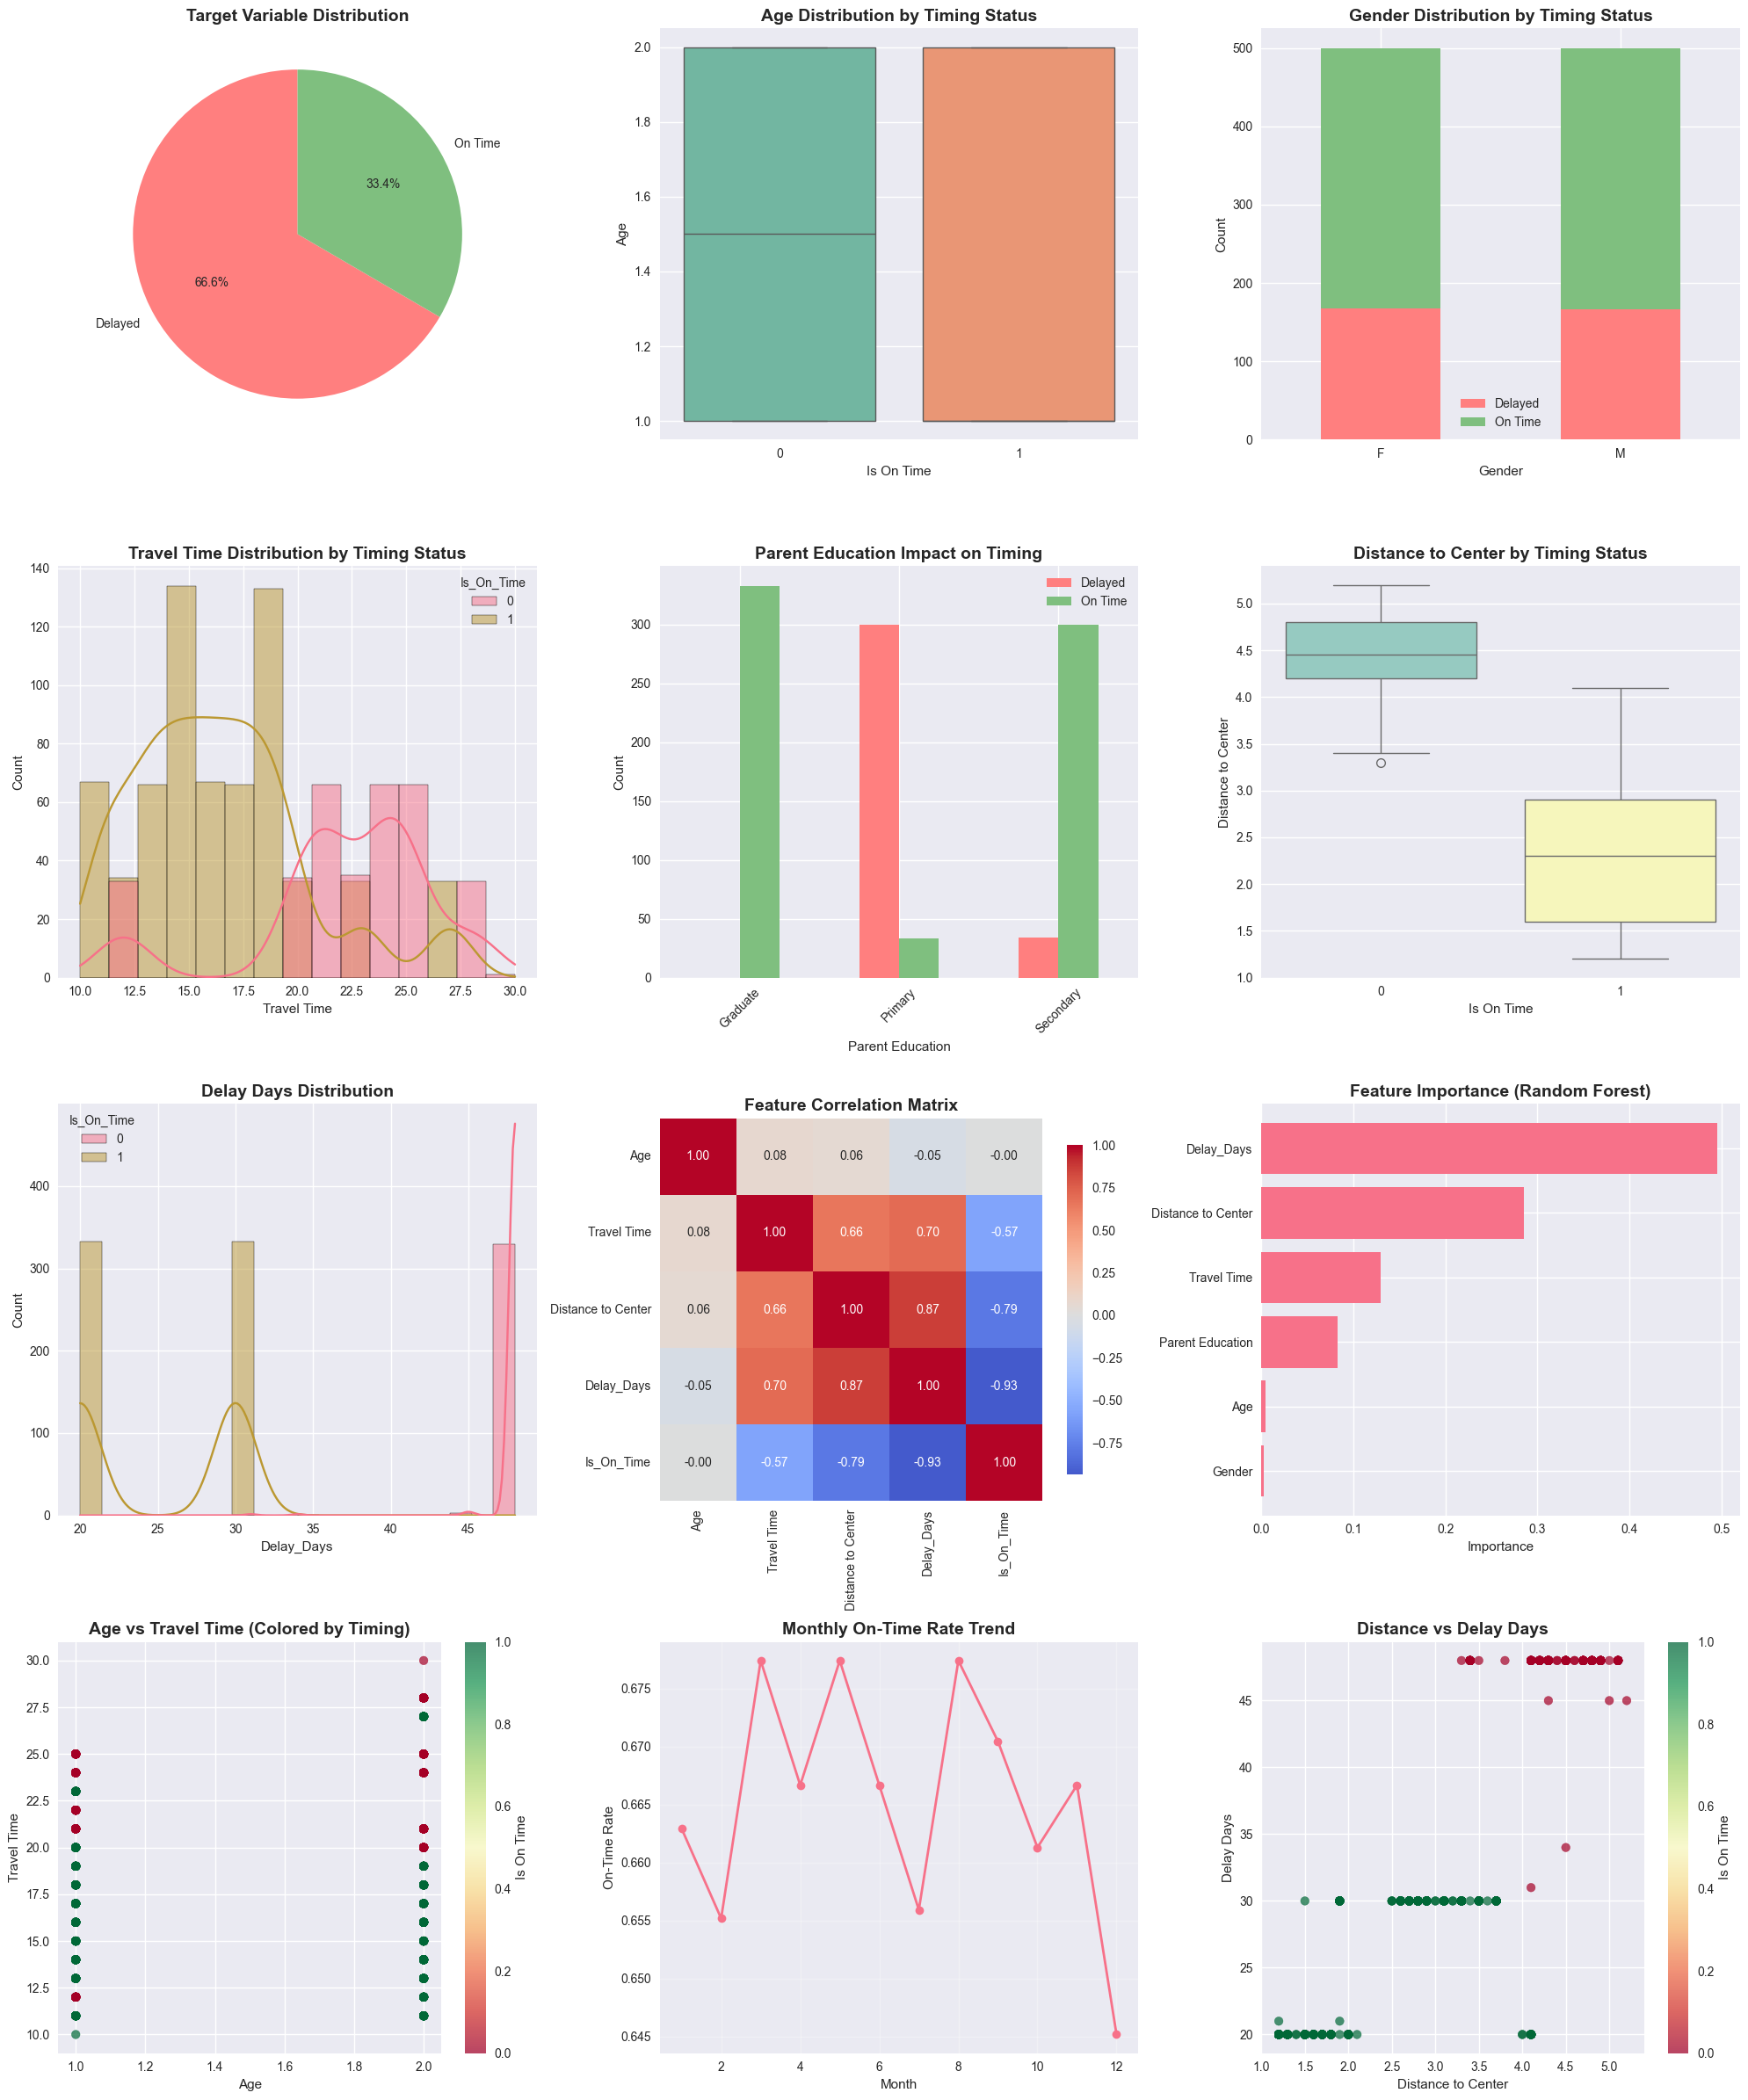


6. ADVANCED STATISTICAL INSIGHTS
------------------------------
Chi-square test results:


NameError: name 'chi2_contingency' is not defined

In [12]:

print("\n" + "="*50)
print("CREATING VISUALIZATIONS")
print("="*50)

# Assume df is already defined and cleaned
fig = plt.figure(figsize=(20, 24))

# 1. Target Distribution
plt.subplot(4, 3, 1)
target_counts = df['Is_On_Time'].value_counts()
colors = ['#ff7f7f', '#7fbf7f']
plt.pie(target_counts.values, labels=['Delayed', 'On Time'], autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Target Variable Distribution', fontsize=14, fontweight='bold')

# 2. Age Distribution by Target
plt.subplot(4, 3, 2)
sns.boxplot(data=df, x='Is_On_Time', y='Age', palette='Set2')
plt.title('Age Distribution by Timing Status', fontsize=14, fontweight='bold')
plt.xlabel('Is On Time')

# 3. Gender Distribution
plt.subplot(4, 3, 3)
gender_target = pd.crosstab(df['Gender'], df['Is_On_Time'])
gender_target.plot(kind='bar', stacked=True, color=['#ff7f7f', '#7fbf7f'], ax=plt.gca())
plt.title('Gender Distribution by Timing Status', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Delayed', 'On Time'])
plt.xticks(rotation=0)

# 4. Travel Time Distribution
plt.subplot(4, 3, 4)
sns.histplot(data=df, x='Travel Time', hue='Is_On_Time', kde=True, bins=15)
plt.title('Travel Time Distribution by Timing Status', fontsize=14, fontweight='bold')

# 5. Parent Education Impact
plt.subplot(4, 3, 5)
education_target = pd.crosstab(df['Parent Education'], df['Is_On_Time'])
education_target.plot(kind='bar', color=['#ff7f7f', '#7fbf7f'], ax=plt.gca())
plt.title('Parent Education Impact on Timing', fontsize=14, fontweight='bold')
plt.xlabel('Parent Education')
plt.ylabel('Count')
plt.legend(['Delayed', 'On Time'])
plt.xticks(rotation=45)

# 6. Distance to Center Analysis
plt.subplot(4, 3, 6)
sns.boxplot(data=df, x='Is_On_Time', y='Distance to Center', palette='Set3')
plt.title('Distance to Center by Timing Status', fontsize=14, fontweight='bold')
plt.xlabel('Is On Time')

# 7. Delay Days Distribution
plt.subplot(4, 3, 7)
sns.histplot(data=df, x='Delay_Days', hue='Is_On_Time', kde=True, bins=20)
plt.title('Delay Days Distribution', fontsize=14, fontweight='bold')

# 8. Correlation Heatmap
plt.subplot(4, 3, 8)
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')

# 9. Feature Importance (Random Forest)
plt.subplot(4, 3, 9)
df_encoded = df.copy()
le_gender = LabelEncoder()
le_education = LabelEncoder()
df_encoded['Gender'] = le_gender.fit_transform(df_encoded['Gender'])
df_encoded['Parent Education'] = le_education.fit_transform(df_encoded['Parent Education'])

feature_cols = ['Gender', 'Age', 'Travel Time', 'Parent Education', 
                'Distance to Center', 'Delay_Days']
X_temp = df_encoded[feature_cols]
y_temp = df_encoded['Is_On_Time']

rf_temp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_temp.fit(X_temp, y_temp)

feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_temp.feature_importances_
}).sort_values('importance', ascending=True)

plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance (Random Forest)', fontsize=14, fontweight='bold')
plt.xlabel('Importance')

# 10. Age vs Travel Time Scatter
plt.subplot(4, 3, 10)
scatter = plt.scatter(df['Age'], df['Travel Time'], 
                      c=df['Is_On_Time'], cmap='RdYlGn', alpha=0.7)
plt.colorbar(scatter, label='Is On Time')
plt.xlabel('Age')
plt.ylabel('Travel Time')
plt.title('Age vs Travel Time (Colored by Timing)', fontsize=14, fontweight='bold')

# 11. Monthly Trend Analysis
plt.subplot(4, 3, 11)
df['Dose1_Date'] = pd.to_datetime(df['Dose1_Date'])
df['Month'] = df['Dose1_Date'].dt.month
monthly_trend = df.groupby('Month')['Is_On_Time'].mean()
plt.plot(monthly_trend.index, monthly_trend.values, marker='o', linewidth=2)
plt.title('Monthly On-Time Rate Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('On-Time Rate')
plt.grid(True, alpha=0.3)

# 12. Distance vs Delay Relationship
plt.subplot(4, 3, 12)
plt.scatter(df['Distance to Center'], df['Delay_Days'], 
            c=df['Is_On_Time'], cmap='RdYlGn', alpha=0.7)
plt.colorbar(label='Is On Time')
plt.xlabel('Distance to Center')
plt.ylabel('Delay Days')
plt.title('Distance vs Delay Days', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Additional Statistical Analysis
print("\n6. ADVANCED STATISTICAL INSIGHTS")
print("-" * 30)

# Chi-square test for categorical variables
print("Chi-square test results:")
for col in ['Gender', 'Parent Education']:
    contingency = pd.crosstab(df[col], df['Is_On_Time'])
    chi2, p_value, dof, expected = chi2_contingency(contingency)
    print(f"{col}: Chi2={chi2:.4f}, p-value={p_value:.4f}")

# T-test for numerical variables
print("\nT-test results (On-time vs Delayed):")
on_time = df[df['Is_On_Time'] == 1]
delayed = df[df['Is_On_Time'] == 0]

for col in ['Age', 'Travel Time', 'Distance to Center', 'Delay_Days']:
    t_stat, p_value = ttest_ind(on_time[col], delayed[col])
    print(f"{col}: t-statistic={t_stat:.4f}, p-value={p_value:.4f}")

🎯 VACCINATION TIMING PREDICTION - ML PIPELINE
🚀 STARTING COMPLETE ML PIPELINE
Dataset loaded successfully!
Shape: (1000, 10)
Columns: ['Child ID', 'Gender', 'Age', 'Travel Time', 'Parent Education', 'Dose1 Date', 'Dose2 Date', 'Distance to Center', 'Delay_Days', 'Is_On_Time']

ADVANCED EXPLORATORY DATA ANALYSIS

1. DATASET OVERVIEW
------------------------------
Dataset Shape: (1000, 12)
Memory Usage: 93.88 KB

Data Types:
Child ID                      object
Gender                        object
Age                            int64
Travel Time                    int64
Parent Education              object
Dose1 Date                    object
Dose2 Date                    object
Distance to Center           float64
Delay_Days                     int64
Is_On_Time                     int64
Dose1_Date            datetime64[ns]
Dose2_Date            datetime64[ns]
dtype: object

2. MISSING VALUES ANALYSIS
------------------------------
Empty DataFrame
Columns: [Missing Count, Missing Percent

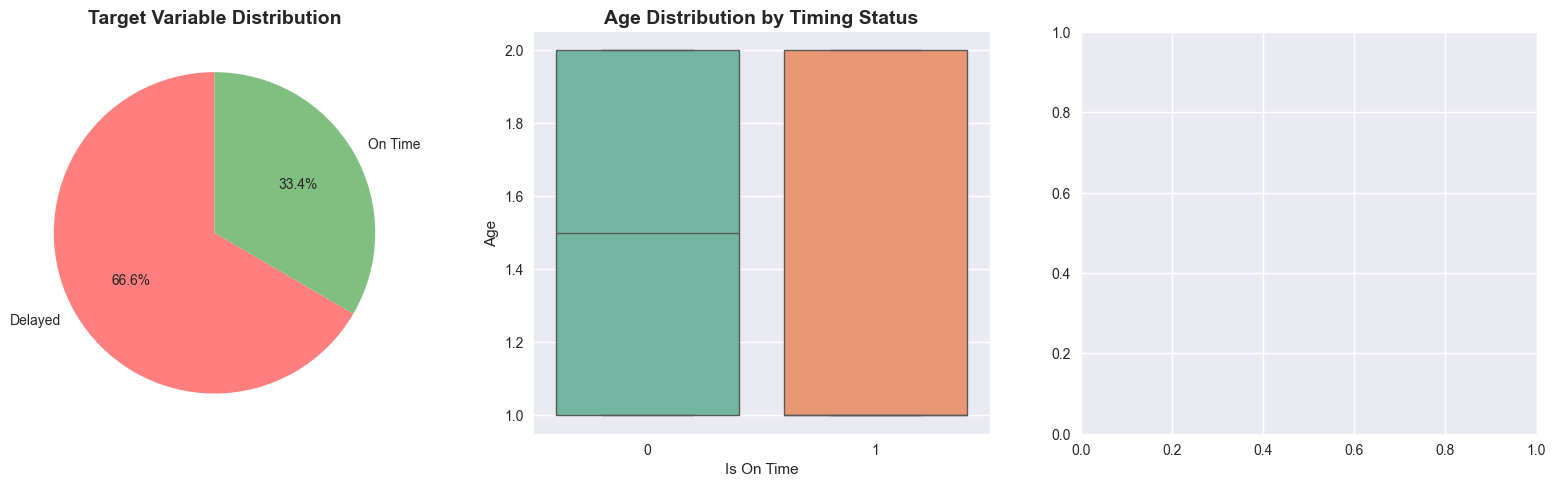

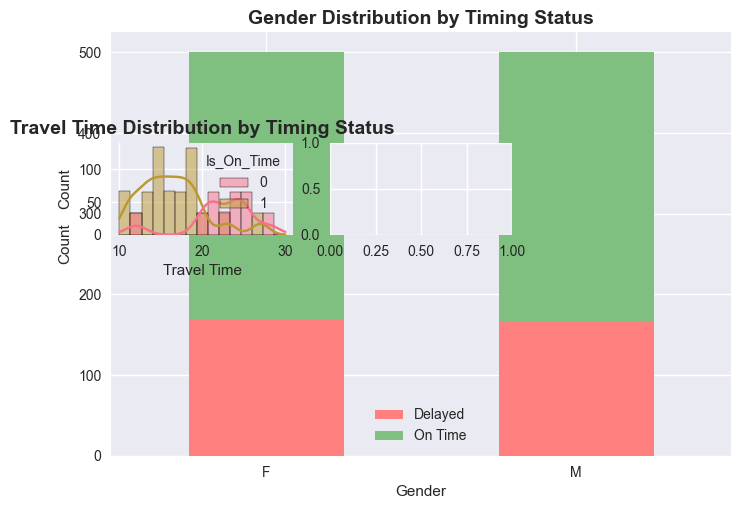

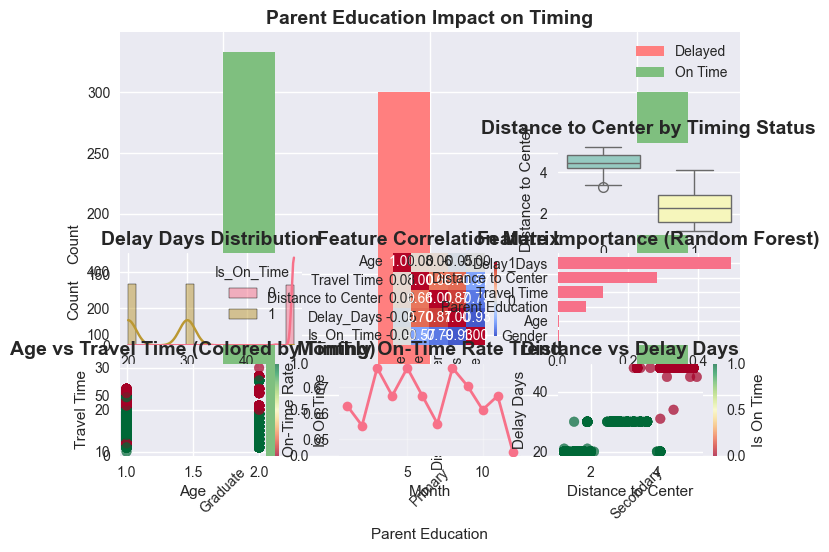


6. ADVANCED STATISTICAL INSIGHTS
------------------------------
Chi-square test results:
Gender: Chi2=0.0045, p-value=0.9465
Parent Education: Chi2=729.0615, p-value=0.0000

T-test results (On-time vs Delayed):
Age: t-statistic=-0.0447, p-value=0.9643
Travel Time: t-statistic=-21.9373, p-value=0.0000
Distance to Center: t-statistic=-40.6614, p-value=0.0000
Delay_Days: t-statistic=-82.3349, p-value=0.0000

FEATURE ENGINEERING
Creating new features...
Encoding categorical variables...
Final feature set: 11 features
Features: ['Gender_Encoded', 'Age', 'Travel Time', 'Parent_Education_Encoded', 'Distance to Center', 'Delay_Days', 'Dose1_Month', 'Dose1_DayOfWeek', 'Days_Between_Doses', 'Travel_Distance_Ratio', 'Age_Travel_Interaction']

BUILDING MACHINE LEARNING MODELS
Training models with cross-validation...
--------------------------------------------------
Training Logistic Regression...
  CV Accuracy: 0.9988 (+/- 0.0050)
  Test Accuracy: 1.0000
  Test ROC-AUC: 1.0000

Training Random F

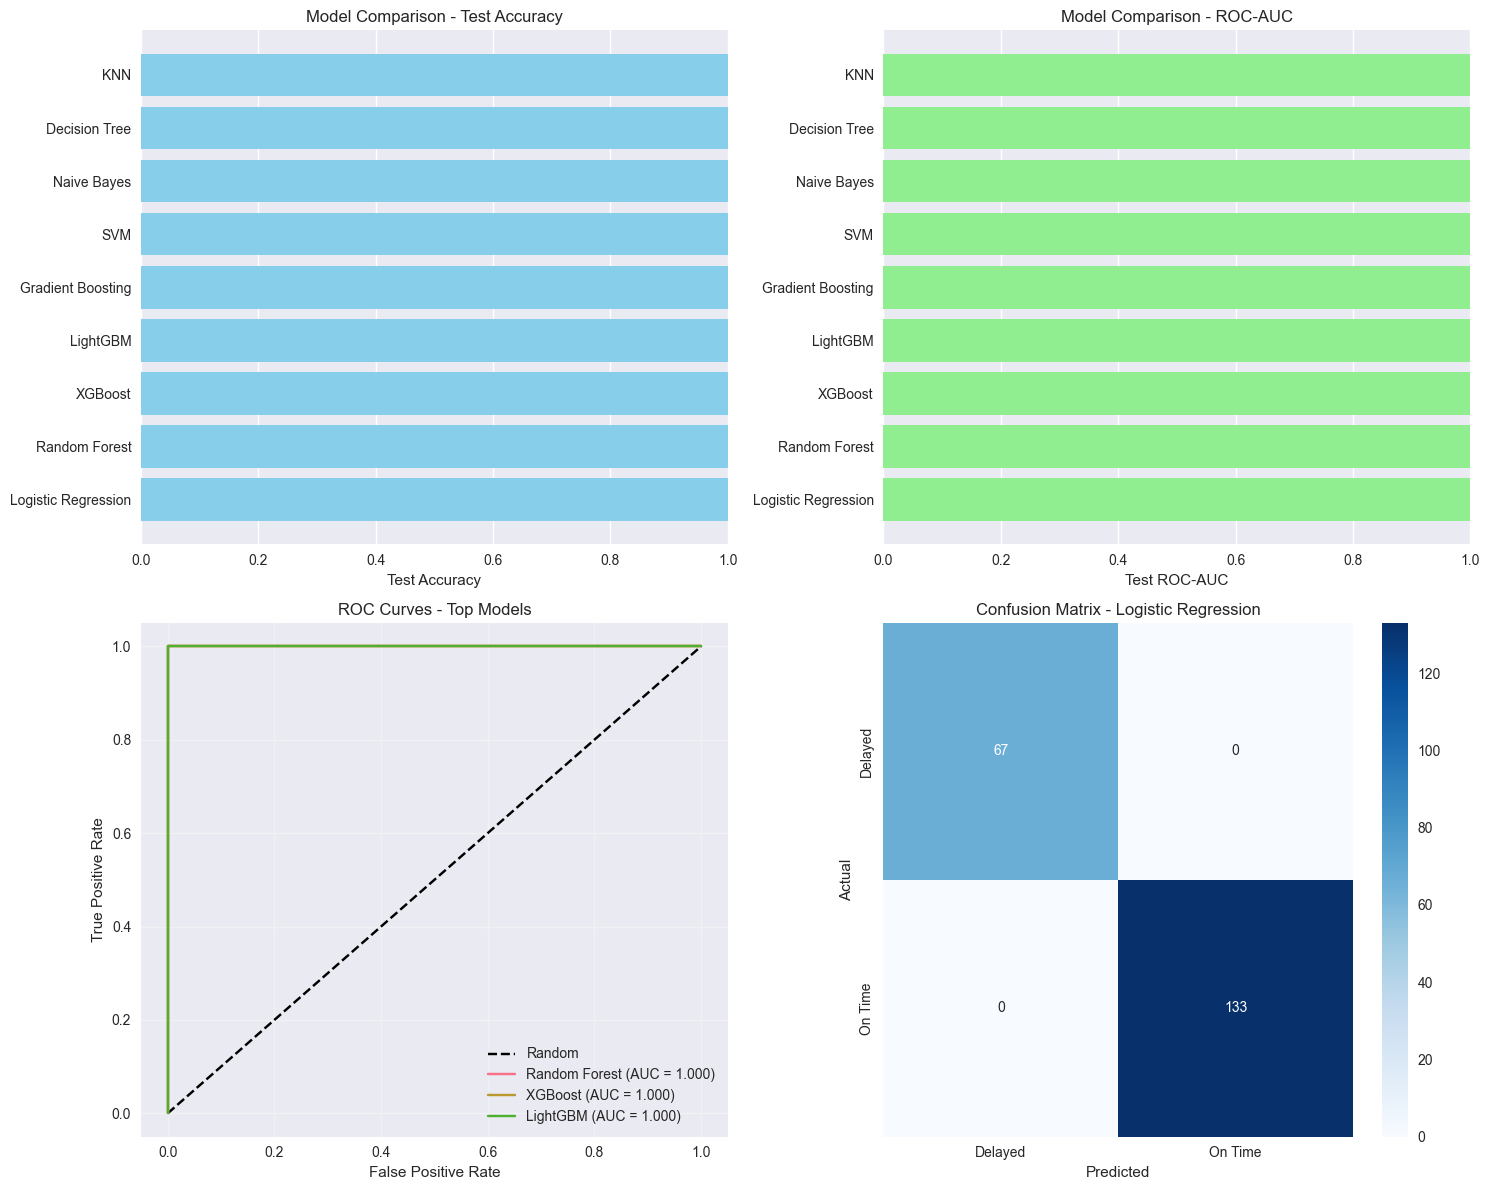


Detailed Classification Report - Logistic Regression:
--------------------------------------------------
              precision    recall  f1-score   support

     Delayed       1.00      1.00      1.00        67
     On Time       1.00      1.00      1.00       133

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


SAVING MODEL
Model saved successfully!
Best Model: Logistic Regression
Best Score (ROC-AUC): 1.0000
Files saved in: models/
- Model: models/best_model_logistic_regression.pkl
- Scaler: models/scaler.pkl
- Encoders: models/label_encoders.pkl
- Features: models/feature_columns.pkl
- Metadata: models/model_metadata.pkl

🎉 PIPELINE COMPLETED SUCCESSFULLY!
Best Model: Logistic Regression
Best ROC-AUC Score: 1.0000

🔮 DEMONSTRATION: MAKING PREDICTIONS
✅ Model loaded successfully!
Model: Logistic Regression
Training Date: 2025-07-18 23:16:21
Best Score: 1.0000

📊 Sin

In [4]:
# Complete Machine Learning Pipeline for Vaccination Timing Classification
# Author: Generated for production-ready ML model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
import xgboost as xgb
import lightgbm as lgb
import joblib
import os

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class VaccinationTimingMLPipeline:
    def __init__(self):
        self.models = {}
        self.best_model = None
        self.best_model_name = None
        self.best_score = 0
        self.scaler = StandardScaler()
        self.label_encoders = {}
        
    def load_and_prepare_data(self, data_path_or_df):
        """Load and prepare the data"""
        if isinstance(data_path_or_df, str):
            self.df = pd.read_csv(data_path_or_df)
        else:
            self.df = data_path_or_df.copy()
        
        print("Dataset loaded successfully!")
        print(f"Shape: {self.df.shape}")
        print(f"Columns: {list(self.df.columns)}")
        
        # Convert date columns
        self.df['Dose1_Date'] = pd.to_datetime(self.df['Dose1 Date'])
        self.df['Dose2_Date'] = pd.to_datetime(self.df['Dose2 Date'])
        
        return self.df
    
    def advanced_eda(self):
        """Perform comprehensive Exploratory Data Analysis"""
        print("\n" + "="*50)
        print("ADVANCED EXPLORATORY DATA ANALYSIS")
        print("="*50)
        
        # Basic Info
        print("\n1. DATASET OVERVIEW")
        print("-" * 30)
        print(f"Dataset Shape: {self.df.shape}")
        print(f"Memory Usage: {self.df.memory_usage().sum() / 1024:.2f} KB")
        print("\nData Types:")
        print(self.df.dtypes)
        
        # Missing Values Analysis
        print("\n2. MISSING VALUES ANALYSIS")
        print("-" * 30)
        missing_data = self.df.isnull().sum()
        missing_percent = (missing_data / len(self.df)) * 100
        missing_df = pd.DataFrame({
            'Missing Count': missing_data,
            'Missing Percentage': missing_percent
        })
        print(missing_df[missing_df['Missing Count'] > 0])
        
        # Statistical Summary
        print("\n3. STATISTICAL SUMMARY")
        print("-" * 30)
        print(self.df.describe())
        
        # Target Variable Analysis
        print("\n4. TARGET VARIABLE ANALYSIS")
        print("-" * 30)
        target_counts = self.df['Is_On_Time'].value_counts()
        target_percent = self.df['Is_On_Time'].value_counts(normalize=True) * 100
        print(f"Class Distribution:")
        print(f"On Time (1): {target_counts[1]} ({target_percent[1]:.1f}%)")
        print(f"Delayed (0): {target_counts[0]} ({target_percent[0]:.1f}%)")
        
        # Correlation Analysis
        print("\n5. CORRELATION ANALYSIS")
        print("-" * 30)
        numeric_cols = self.df.select_dtypes(include=[np.number]).columns
        correlation_matrix = self.df[numeric_cols].corr()
        print("Correlation with Target Variable:")
        target_corr = correlation_matrix['Is_On_Time'].sort_values(ascending=False)
        print(target_corr)
        
        return missing_df, target_counts, correlation_matrix
    
    def create_visualizations(self):
        """Create comprehensive visualizations"""
        print("\n" + "="*50)
        print("CREATING VISUALIZATIONS")
        print("="*50)
        
        # Set up the plot layout
        fig = plt.figure(figsize=(20, 24))
        
        # 1. Target Distribution
        plt.subplot(4, 3, 1)
        target_counts = self.df['Is_On_Time'].value_counts()
        colors = ['#ff7f7f', '#7fbf7f']
        plt.pie(target_counts.values, labels=['Delayed', 'On Time'], autopct='%1.1f%%', 
                colors=colors, startangle=90)
        plt.title('Target Variable Distribution', fontsize=14, fontweight='bold')
        
        # 2. Age Distribution by Target
        plt.subplot(4, 3, 2)
        sns.boxplot(data=self.df, x='Is_On_Time', y='Age', palette='Set2')
        plt.title('Age Distribution by Timing Status', fontsize=14, fontweight='bold')
        plt.xlabel('Is On Time')
        
        # 3. Gender Distribution
        plt.subplot(4, 3, 3)
        gender_target = pd.crosstab(self.df['Gender'], self.df['Is_On_Time'])
        gender_target.plot(kind='bar', stacked=True, color=['#ff7f7f', '#7fbf7f'])
        plt.title('Gender Distribution by Timing Status', fontsize=14, fontweight='bold')
        plt.xlabel('Gender')
        plt.ylabel('Count')
        plt.legend(['Delayed', 'On Time'])
        plt.xticks(rotation=0)
        
        # 4. Travel Time Distribution
        plt.subplot(4, 3, 4)
        sns.histplot(data=self.df, x='Travel Time', hue='Is_On_Time', kde=True, bins=15)
        plt.title('Travel Time Distribution by Timing Status', fontsize=14, fontweight='bold')
        
        # 5. Parent Education Impact
        plt.subplot(4, 3, 5)
        education_target = pd.crosstab(self.df['Parent Education'], self.df['Is_On_Time'])
        education_target.plot(kind='bar', color=['#ff7f7f', '#7fbf7f'])
        plt.title('Parent Education Impact on Timing', fontsize=14, fontweight='bold')
        plt.xlabel('Parent Education')
        plt.ylabel('Count')
        plt.legend(['Delayed', 'On Time'])
        plt.xticks(rotation=45)
        
        # 6. Distance to Center Analysis
        plt.subplot(4, 3, 6)
        sns.boxplot(data=self.df, x='Is_On_Time', y='Distance to Center', palette='Set3')
        plt.title('Distance to Center by Timing Status', fontsize=14, fontweight='bold')
        plt.xlabel('Is On Time')
        
        # 7. Delay Days Distribution
        plt.subplot(4, 3, 7)
        sns.histplot(data=self.df, x='Delay_Days', hue='Is_On_Time', kde=True, bins=20)
        plt.title('Delay Days Distribution', fontsize=14, fontweight='bold')
        
        # 8. Correlation Heatmap
        plt.subplot(4, 3, 8)
        numeric_cols = self.df.select_dtypes(include=[np.number]).columns
        correlation_matrix = self.df[numeric_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                   square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
        plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
        
        # 9. Feature Importance (using Random Forest)
        plt.subplot(4, 3, 9)
        # Prepare data for feature importance
        df_encoded = self.df.copy()
        
        # Label encode categorical variables
        le_gender = LabelEncoder()
        le_education = LabelEncoder()
        df_encoded['Gender'] = le_gender.fit_transform(df_encoded['Gender'])
        df_encoded['Parent Education'] = le_education.fit_transform(df_encoded['Parent Education'])
        
        # Select features for importance
        feature_cols = ['Gender', 'Age', 'Travel Time', 'Parent Education', 
                       'Distance to Center', 'Delay_Days']
        X_temp = df_encoded[feature_cols]
        y_temp = df_encoded['Is_On_Time']
        
        # Fit Random Forest for feature importance
        rf_temp = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_temp.fit(X_temp, y_temp)
        
        # Plot feature importance
        feature_importance = pd.DataFrame({
            'feature': feature_cols,
            'importance': rf_temp.feature_importances_
        }).sort_values('importance', ascending=True)
        
        plt.barh(feature_importance['feature'], feature_importance['importance'])
        plt.title('Feature Importance (Random Forest)', fontsize=14, fontweight='bold')
        plt.xlabel('Importance')
        
        # 10. Age vs Travel Time Scatter
        plt.subplot(4, 3, 10)
        scatter = plt.scatter(self.df['Age'], self.df['Travel Time'], 
                            c=self.df['Is_On_Time'], cmap='RdYlGn', alpha=0.7)
        plt.colorbar(scatter, label='Is On Time')
        plt.xlabel('Age')
        plt.ylabel('Travel Time')
        plt.title('Age vs Travel Time (Colored by Timing)', fontsize=14, fontweight='bold')
        
        # 11. Monthly Trend Analysis
        plt.subplot(4, 3, 11)
        self.df['Month'] = self.df['Dose1_Date'].dt.month
        monthly_trend = self.df.groupby('Month')['Is_On_Time'].mean()
        plt.plot(monthly_trend.index, monthly_trend.values, marker='o', linewidth=2)
        plt.title('Monthly On-Time Rate Trend', fontsize=14, fontweight='bold')
        plt.xlabel('Month')
        plt.ylabel('On-Time Rate')
        plt.grid(True, alpha=0.3)
        
        # 12. Distance vs Delay Relationship
        plt.subplot(4, 3, 12)
        plt.scatter(self.df['Distance to Center'], self.df['Delay_Days'], 
                   c=self.df['Is_On_Time'], cmap='RdYlGn', alpha=0.7)
        plt.colorbar(label='Is On Time')
        plt.xlabel('Distance to Center')
        plt.ylabel('Delay Days')
        plt.title('Distance vs Delay Days', fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        # Additional Statistical Analysis
        print("\n6. ADVANCED STATISTICAL INSIGHTS")
        print("-" * 30)
        
        # Chi-square test for categorical variables
        from scipy.stats import chi2_contingency
        
        print("Chi-square test results:")
        for col in ['Gender', 'Parent Education']:
            contingency = pd.crosstab(self.df[col], self.df['Is_On_Time'])
            chi2, p_value, dof, expected = chi2_contingency(contingency)
            print(f"{col}: Chi2={chi2:.4f}, p-value={p_value:.4f}")
        
        # T-test for numerical variables
        from scipy.stats import ttest_ind
        
        print("\nT-test results (On-time vs Delayed):")
        on_time = self.df[self.df['Is_On_Time'] == 1]
        delayed = self.df[self.df['Is_On_Time'] == 0]
        
        for col in ['Age', 'Travel Time', 'Distance to Center', 'Delay_Days']:
            t_stat, p_value = ttest_ind(on_time[col], delayed[col])
            print(f"{col}: t-statistic={t_stat:.4f}, p-value={p_value:.4f}")
    
    def prepare_features(self):
        """Prepare features for machine learning"""
        print("\n" + "="*50)
        print("FEATURE ENGINEERING")
        print("="*50)
        
        # Create a copy for feature engineering
        df_features = self.df.copy()
        
        # Feature Engineering
        print("Creating new features...")
        
        # 1. Time-based features
        df_features['Dose1_Month'] = df_features['Dose1_Date'].dt.month
        df_features['Dose1_DayOfWeek'] = df_features['Dose1_Date'].dt.dayofweek
        df_features['Days_Between_Doses'] = (df_features['Dose2_Date'] - df_features['Dose1_Date']).dt.days
        
        # 2. Interaction features
        df_features['Travel_Distance_Ratio'] = df_features['Travel Time'] / df_features['Distance to Center']
        df_features['Age_Travel_Interaction'] = df_features['Age'] * df_features['Travel Time']
        
        # 3. Categorical encoding
        print("Encoding categorical variables...")
        
        # Gender encoding
        self.label_encoders['Gender'] = LabelEncoder()
        df_features['Gender_Encoded'] = self.label_encoders['Gender'].fit_transform(df_features['Gender'])
        
        # Parent Education encoding (ordinal)
        education_mapping = {'Primary': 1, 'Secondary': 2, 'Graduate': 3}
        df_features['Parent_Education_Encoded'] = df_features['Parent Education'].map(education_mapping)
        
        # Select final features
        feature_columns = [
            'Gender_Encoded', 'Age', 'Travel Time', 'Parent_Education_Encoded',
            'Distance to Center', 'Delay_Days', 'Dose1_Month', 'Dose1_DayOfWeek',
            'Days_Between_Doses', 'Travel_Distance_Ratio', 'Age_Travel_Interaction'
        ]
        
        X = df_features[feature_columns]
        y = df_features['Is_On_Time']
        
        print(f"Final feature set: {len(feature_columns)} features")
        print(f"Features: {feature_columns}")
        
        return X, y, feature_columns
    
    def build_models(self, X, y):
        """Build and train multiple ML models"""
        print("\n" + "="*50)
        print("BUILDING MACHINE LEARNING MODELS")
        print("="*50)
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        # Scale the features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        # Store test data for later use
        self.X_test = X_test_scaled
        self.y_test = y_test
        self.feature_columns = X.columns.tolist()
        
        # Define models
        models = {
            'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
            'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
            'LightGBM': lgb.LGBMClassifier(random_state=42, verbose=-1),
            'Gradient Boosting': GradientBoostingClassifier(random_state=42),
            'SVM': SVC(random_state=42, probability=True),
            'Naive Bayes': GaussianNB(),
            'Decision Tree': DecisionTreeClassifier(random_state=42),
            'KNN': KNeighborsClassifier(n_neighbors=5)
        }
        
        # Cross-validation setup
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        
        results = {}
        
        print("Training models with cross-validation...")
        print("-" * 50)
        
        for name, model in models.items():
            print(f"Training {name}...")
            
            # Cross-validation scores
            cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
            cv_roc_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='roc_auc')
            
            # Train on full training set
            model.fit(X_train_scaled, y_train)
            
            # Test set predictions
            y_pred = model.predict(X_test_scaled)
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
            
            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred_proba)
            
            results[name] = {
                'model': model,
                'cv_accuracy_mean': cv_scores.mean(),
                'cv_accuracy_std': cv_scores.std(),
                'cv_roc_auc_mean': cv_roc_scores.mean(),
                'cv_roc_auc_std': cv_roc_scores.std(),
                'test_accuracy': accuracy,
                'test_roc_auc': roc_auc,
                'predictions': y_pred,
                'predictions_proba': y_pred_proba
            }
            
            print(f"  CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
            print(f"  Test Accuracy: {accuracy:.4f}")
            print(f"  Test ROC-AUC: {roc_auc:.4f}")
            print()
        
        self.models = results
        
        # Find best model
        best_model_name = max(results.keys(), key=lambda k: results[k]['test_roc_auc'])
        self.best_model = results[best_model_name]['model']
        self.best_model_name = best_model_name
        self.best_score = results[best_model_name]['test_roc_auc']
        
        print(f"Best Model: {best_model_name} (ROC-AUC: {self.best_score:.4f})")
        
        return results
    
    def hyperparameter_tuning(self, X, y):
        """Perform hyperparameter tuning for top models"""
        print("\n" + "="*50)
        print("HYPERPARAMETER TUNING")
        print("="*50)
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        # Define parameter grids for top models
        param_grids = {
            'Random Forest': {
                'n_estimators': [50, 100, 200],
                'max_depth': [10, 20, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            },
            'XGBoost': {
                'n_estimators': [50, 100, 200],
                'max_depth': [3, 6, 10],
                'learning_rate': [0.01, 0.1, 0.2],
                'subsample': [0.8, 1.0]
            },
            'LightGBM': {
                'n_estimators': [50, 100, 200],
                'max_depth': [3, 6, 10],
                'learning_rate': [0.01, 0.1, 0.2],
                'num_leaves': [31, 50, 100]
            }
        }
        
        tuned_models = {}
        
        for model_name, param_grid in param_grids.items():
            print(f"Tuning {model_name}...")
            
            if model_name == 'Random Forest':
                base_model = RandomForestClassifier(random_state=42)
            elif model_name == 'XGBoost':
                base_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
            elif model_name == 'LightGBM':
                base_model = lgb.LGBMClassifier(random_state=42, verbose=-1)
            
            grid_search = GridSearchCV(
                base_model, param_grid, cv=3, scoring='roc_auc', 
                n_jobs=-1, verbose=1
            )
            
            grid_search.fit(X_train_scaled, y_train)
            
            # Test the best model
            y_pred = grid_search.predict(X_test_scaled)
            y_pred_proba = grid_search.predict_proba(X_test_scaled)[:, 1]
            
            accuracy = accuracy_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred_proba)
            
            tuned_models[model_name] = {
                'model': grid_search.best_estimator_,
                'best_params': grid_search.best_params_,
                'best_cv_score': grid_search.best_score_,
                'test_accuracy': accuracy,
                'test_roc_auc': roc_auc
            }
            
            print(f"  Best parameters: {grid_search.best_params_}")
            print(f"  Best CV score: {grid_search.best_score_:.4f}")
            print(f"  Test ROC-AUC: {roc_auc:.4f}")
            print()
        
        # Update best model if tuning improved performance
        best_tuned_name = max(tuned_models.keys(), key=lambda k: tuned_models[k]['test_roc_auc'])
        if tuned_models[best_tuned_name]['test_roc_auc'] > self.best_score:
            self.best_model = tuned_models[best_tuned_name]['model']
            self.best_model_name = f"{best_tuned_name} (Tuned)"
            self.best_score = tuned_models[best_tuned_name]['test_roc_auc']
            print(f"New best model after tuning: {self.best_model_name} (ROC-AUC: {self.best_score:.4f})")
        
        return tuned_models
    
    def evaluate_models(self):
        """Create comprehensive model evaluation"""
        print("\n" + "="*50)
        print("MODEL EVALUATION")
        print("="*50)
        
        # Create comparison dataframe
        comparison_data = []
        for name, results in self.models.items():
            comparison_data.append({
                'Model': name,
                'CV Accuracy': f"{results['cv_accuracy_mean']:.4f} ± {results['cv_accuracy_std']:.4f}",
                'Test Accuracy': f"{results['test_accuracy']:.4f}",
                'CV ROC-AUC': f"{results['cv_roc_auc_mean']:.4f} ± {results['cv_roc_auc_std']:.4f}",
                'Test ROC-AUC': f"{results['test_roc_auc']:.4f}"
            })
        
        comparison_df = pd.DataFrame(comparison_data)
        comparison_df = comparison_df.sort_values('Test ROC-AUC', ascending=False)
        
        print("Model Performance Comparison:")
        print(comparison_df.to_string(index=False))
        
        # Visualization
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # 1. Model Comparison - Test Accuracy
        model_names = list(self.models.keys())
        test_accuracies = [self.models[name]['test_accuracy'] for name in model_names]
        
        axes[0, 0].barh(model_names, test_accuracies, color='skyblue')
        axes[0, 0].set_xlabel('Test Accuracy')
        axes[0, 0].set_title('Model Comparison - Test Accuracy')
        axes[0, 0].set_xlim(0, 1)
        
        # 2. Model Comparison - ROC-AUC
        test_roc_aucs = [self.models[name]['test_roc_auc'] for name in model_names]
        
        axes[0, 1].barh(model_names, test_roc_aucs, color='lightgreen')
        axes[0, 1].set_xlabel('Test ROC-AUC')
        axes[0, 1].set_title('Model Comparison - ROC-AUC')
        axes[0, 1].set_xlim(0, 1)
        
        # 3. ROC Curves
        axes[1, 0].plot([0, 1], [0, 1], 'k--', label='Random')
        
        for name, results in self.models.items():
            if name in ['Random Forest', 'XGBoost', 'LightGBM']:  # Top 3 models
                fpr, tpr, _ = roc_curve(self.y_test, results['predictions_proba'])
                axes[1, 0].plot(fpr, tpr, label=f"{name} (AUC = {results['test_roc_auc']:.3f})")
        
        axes[1, 0].set_xlabel('False Positive Rate')
        axes[1, 0].set_ylabel('True Positive Rate')
        axes[1, 0].set_title('ROC Curves - Top Models')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
        
        # 4. Confusion Matrix for Best Model
        best_results = self.models[self.best_model_name]
        cm = confusion_matrix(self.y_test, best_results['predictions'])
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=['Delayed', 'On Time'], 
                   yticklabels=['Delayed', 'On Time'], ax=axes[1, 1])
        axes[1, 1].set_title(f'Confusion Matrix - {self.best_model_name}')
        axes[1, 1].set_xlabel('Predicted')
        axes[1, 1].set_ylabel('Actual')
        
        plt.tight_layout()
        plt.show()
        
        # Detailed classification report for best model
        print(f"\nDetailed Classification Report - {self.best_model_name}:")
        print("-" * 50)
        print(classification_report(self.y_test, best_results['predictions'], 
                                  target_names=['Delayed', 'On Time']))
        
        return comparison_df
    
    def save_model(self, model_path='models/'):
        """Save the best model and preprocessing objects"""
        print("\n" + "="*50)
        print("SAVING MODEL")
        print("="*50)
        
        # Create models directory if it doesn't exist
        os.makedirs(model_path, exist_ok=True)
        
        # Save the best model
        model_filename = f"{model_path}best_model_{self.best_model_name.replace(' ', '_').lower()}.pkl"
        joblib.dump(self.best_model, model_filename)
        
        # Save the scaler
        scaler_filename = f"{model_path}scaler.pkl"
        joblib.dump(self.scaler, scaler_filename)
        
        # Save label encoders
        encoders_filename = f"{model_path}label_encoders.pkl"
        joblib.dump(self.label_encoders, encoders_filename)
        
        # Save feature columns
        features_filename = f"{model_path}feature_columns.pkl"
        joblib.dump(self.feature_columns, features_filename)
        
        # Save model metadata
        metadata = {
            'best_model_name': self.best_model_name,
            'best_score': self.best_score,
            'feature_columns': self.feature_columns,
            'model_type': str(type(self.best_model)),
            'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        }
        
        metadata_filename = f"{model_path}model_metadata.pkl"
        joblib.dump(metadata, metadata_filename)
        
        print(f"Model saved successfully!")
        print(f"Best Model: {self.best_model_name}")
        print(f"Best Score (ROC-AUC): {self.best_score:.4f}")
        print(f"Files saved in: {model_path}")
        print(f"- Model: {model_filename}")
        print(f"- Scaler: {scaler_filename}")
        print(f"- Encoders: {encoders_filename}")
        print(f"- Features: {features_filename}")
        print(f"- Metadata: {metadata_filename}")
        
        return model_filename
    
    def run_complete_pipeline(self, data_path_or_df, save_models=True):
        """Run the complete ML pipeline"""
        print("🚀 STARTING COMPLETE ML PIPELINE")
        print("="*60)
        
        # Step 1: Load and prepare data
        self.load_and_prepare_data(data_path_or_df)
        
        # Step 2: Exploratory Data Analysis
        self.advanced_eda()
        
        # Step 3: Create visualizations
        self.create_visualizations()
        
        # Step 4: Feature engineering
        X, y, feature_columns = self.prepare_features()
        
        # Step 5: Build and train models
        model_results = self.build_models(X, y)
        
        # Step 6: Hyperparameter tuning
        tuned_results = self.hyperparameter_tuning(X, y)
        
        # Step 7: Evaluate models
        comparison_df = self.evaluate_models()
        
        # Step 8: Save the best model
        if save_models:
            model_path = self.save_model()
        
        print("\n🎉 PIPELINE COMPLETED SUCCESSFULLY!")
        print("="*60)
        print(f"Best Model: {self.best_model_name}")
        print(f"Best ROC-AUC Score: {self.best_score:.4f}")
        
        return {
            'best_model': self.best_model,
            'best_model_name': self.best_model_name,
            'best_score': self.best_score,
            'model_results': model_results,
            'tuned_results': tuned_results,
            'comparison_df': comparison_df,
            'feature_columns': feature_columns
        }


# Prediction Class for using saved models
class VaccinationPrediction:
    def __init__(self, model_path='models/'):
        self.model_path = model_path
        self.model = None
        self.scaler = None
        self.label_encoders = None
        self.feature_columns = None
        self.metadata = None
        
    def load_model(self):
        """Load the saved model and preprocessing objects"""
        try:
            # Load metadata first
            metadata_file = f"{self.model_path}model_metadata.pkl"
            self.metadata = joblib.load(metadata_file)
            
            # Load model
            model_files = [f for f in os.listdir(self.model_path) if f.startswith('best_model_') and f.endswith('.pkl')]
            if not model_files:
                raise FileNotFoundError("No model file found")
            
            model_file = f"{self.model_path}{model_files[0]}"
            self.model = joblib.load(model_file)
            
            # Load scaler
            scaler_file = f"{self.model_path}scaler.pkl"
            self.scaler = joblib.load(scaler_file)
            
            # Load label encoders
            encoders_file = f"{self.model_path}label_encoders.pkl"
            self.label_encoders = joblib.load(encoders_file)
            
            # Load feature columns
            features_file = f"{self.model_path}feature_columns.pkl"
            self.feature_columns = joblib.load(features_file)
            
            print("✅ Model loaded successfully!")
            print(f"Model: {self.metadata['best_model_name']}")
            print(f"Training Date: {self.metadata['training_date']}")
            print(f"Best Score: {self.metadata['best_score']:.4f}")
            
            return True
            
        except Exception as e:
            print(f"❌ Error loading model: {str(e)}")
            return False
    
    def prepare_input_data(self, input_data):
        """Prepare input data for prediction"""
        if isinstance(input_data, dict):
            # Single prediction
            df = pd.DataFrame([input_data])
        else:
            # Multiple predictions
            df = pd.DataFrame(input_data)
        
        # Convert date columns if present
        if 'Dose1 Date' in df.columns:
            df['Dose1_Date'] = pd.to_datetime(df['Dose1 Date'])
        if 'Dose2 Date' in df.columns:
            df['Dose2_Date'] = pd.to_datetime(df['Dose2 Date'])
        
        # Feature engineering (same as training)
        if 'Dose1_Date' in df.columns:
            df['Dose1_Month'] = df['Dose1_Date'].dt.month
            df['Dose1_DayOfWeek'] = df['Dose1_Date'].dt.dayofweek
        
        if 'Dose1_Date' in df.columns and 'Dose2_Date' in df.columns:
            df['Days_Between_Doses'] = (df['Dose2_Date'] - df['Dose1_Date']).dt.days
        
        # Interaction features
        if 'Travel Time' in df.columns and 'Distance to Center' in df.columns:
            df['Travel_Distance_Ratio'] = df['Travel Time'] / df['Distance to Center']
        
        if 'Age' in df.columns and 'Travel Time' in df.columns:
            df['Age_Travel_Interaction'] = df['Age'] * df['Travel Time']
        
        # Encode categorical variables
        if 'Gender' in df.columns:
            df['Gender_Encoded'] = self.label_encoders['Gender'].transform(df['Gender'])
        
        if 'Parent Education' in df.columns:
            education_mapping = {'Primary': 1, 'Secondary': 2, 'Graduate': 3}
            df['Parent_Education_Encoded'] = df['Parent Education'].map(education_mapping)
        
        # Select only the features used in training
        X = df[self.feature_columns]
        
        return X
    
    def predict(self, input_data, return_probabilities=False):
        """Make predictions on new data"""
        if self.model is None:
            raise ValueError("Model not loaded. Call load_model() first.")
        
        # Prepare input data
        X = self.prepare_input_data(input_data)
        
        # Scale features
        X_scaled = self.scaler.transform(X)
        
        # Make predictions
        predictions = self.model.predict(X_scaled)
        
        if return_probabilities:
            probabilities = self.model.predict_proba(X_scaled)
            return predictions, probabilities
        
        return predictions
    
    def predict_with_explanation(self, input_data):
        """Make predictions with detailed explanation"""
        if self.model is None:
            raise ValueError("Model not loaded. Call load_model() first.")
        
        # Prepare input data
        X = self.prepare_input_data(input_data)
        X_scaled = self.scaler.transform(X)
        
        # Make predictions
        predictions = self.model.predict(X_scaled)
        probabilities = self.model.predict_proba(X_scaled)
        
        results = []
        
        for i in range(len(predictions)):
            result = {
                'prediction': 'On Time' if predictions[i] == 1 else 'Delayed',
                'confidence': max(probabilities[i]) * 100,
                'probability_delayed': probabilities[i][0] * 100,
                'probability_on_time': probabilities[i][1] * 100,
                'input_features': X.iloc[i].to_dict()
            }
            results.append(result)
        
        return results
    
    def batch_predict(self, csv_file_path, output_file_path=None):
        """Predict on a batch of data from CSV file"""
        if self.model is None:
            raise ValueError("Model not loaded. Call load_model() first.")
        
        # Load data
        df = pd.read_csv(csv_file_path)
        
        # Make predictions
        predictions = self.predict(df, return_probabilities=True)
        pred_labels, pred_probs = predictions
        
        # Add predictions to dataframe
        df['Predicted_Label'] = pred_labels
        df['Predicted_Status'] = ['On Time' if p == 1 else 'Delayed' for p in pred_labels]
        df['Confidence'] = [max(prob) * 100 for prob in pred_probs]
        df['Probability_Delayed'] = [prob[0] * 100 for prob in pred_probs]
        df['Probability_On_Time'] = [prob[1] * 100 for prob in pred_probs]
        
        # Save results
        if output_file_path:
            df.to_csv(output_file_path, index=False)
            print(f"✅ Predictions saved to: {output_file_path}")
        
        return df


# Example usage and demonstration
def main():
    """Main function to demonstrate the pipeline"""
    

    
    df = pd.read_csv("E:/VaccineLedger/Backend/data/dropout_prediction_satara.csv")
    
    print("🎯 VACCINATION TIMING PREDICTION - ML PIPELINE")
    print("="*60)
    
    # Initialize pipeline
    pipeline = VaccinationTimingMLPipeline()
    
    # Run complete pipeline
    results = pipeline.run_complete_pipeline(df, save_models=True)
    
    print("\n" + "="*60)
    print("🔮 DEMONSTRATION: MAKING PREDICTIONS")
    print("="*60)
    
    # Initialize prediction system
    predictor = VaccinationPrediction()
    
    # Load the saved model
    if predictor.load_model():
        
        # Example prediction for a new patient
        new_patient = {
            'Gender': 'M',
            'Age': 1,
            'Travel Time': 20,
            'Parent Education': 'Graduate',
            'Dose1 Date': '2024-01-20',
            'Dose2 Date': '2024-02-15',
            'Distance to Center': 3.0,
            'Delay_Days': 26
        }
        
        print("\n📊 Single Patient Prediction:")
        print("-" * 40)
        prediction_results = predictor.predict_with_explanation(new_patient)
        
        for result in prediction_results:
            print(f"Prediction: {result['prediction']}")
            print(f"Confidence: {result['confidence']:.1f}%")
            print(f"Probability of being On Time: {result['probability_on_time']:.1f}%")
            print(f"Probability of being Delayed: {result['probability_delayed']:.1f}%")
        
        # Example batch prediction
        print("\n📈 Batch Prediction Example:")
        print("-" * 40)
        
        batch_data = [
            {'Gender': 'F', 'Age': 2, 'Travel Time': 35, 'Parent Education': 'Primary', 
             'Dose1 Date': '2024-01-25', 'Dose2 Date': '2024-03-10', 'Distance to Center': 6.0, 'Delay_Days': 45},
            {'Gender': 'M', 'Age': 1, 'Travel Time': 10, 'Parent Education': 'Graduate', 
             'Dose1 Date': '2024-01-30', 'Dose2 Date': '2024-02-18', 'Distance to Center': 1.5, 'Delay_Days': 19}
        ]
        
        batch_results = predictor.predict_with_explanation(batch_data)
        
        for i, result in enumerate(batch_results):
            print(f"Patient {i+1}: {result['prediction']} (Confidence: {result['confidence']:.1f}%)")
    
    print("\n✅ PIPELINE COMPLETED SUCCESSFULLY!")
    print("="*60)
    
    return results


if __name__ == "__main__":
    # Run the complete pipeline
    results = main()
    
    print("\n📋 USAGE INSTRUCTIONS:")
    print("="*60)
    print("1. Training Phase:")
    print("   pipeline = VaccinationTimingMLPipeline()")
    print("   results = pipeline.run_complete_pipeline('your_data.csv')")
    print()
    print("2. Prediction Phase:")
    print("   predictor = VaccinationPrediction()")
    print("   predictor.load_model()")
    print("   predictions = predictor.predict(new_data)")
    print()
    print("3. Batch Prediction:")
    print("   predictor.batch_predict('new_data.csv', 'predictions.csv')")
    print("="*60)

In [6]:
# Vaccination Timing Prediction System
# Use this code to make predictions with your saved model

import pandas as pd
import numpy as np
import joblib
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

class VaccinationPredictor:
    def __init__(self, model_path='models/'):
        """
        Initialize the prediction system
        
        Args:
            model_path (str): Path to the directory containing saved model files
        """
        self.model_path = model_path
        self.model = None
        self.scaler = None
        self.label_encoders = None
        self.feature_columns = None
        self.metadata = None
        
    def load_model(self):
        """Load the saved model and all preprocessing components"""
        try:
            print("Loading model components...")
            
            # Load metadata
            metadata_file = f"{self.model_path}model_metadata.pkl"
            if os.path.exists(metadata_file):
                self.metadata = joblib.load(metadata_file)
                print(f"✅ Model: {self.metadata['best_model_name']}")
                print(f"✅ Training Date: {self.metadata['training_date']}")
                print(f"✅ Best Score: {self.metadata['best_score']:.4f}")
            
            # Load the trained model
            model_files = [f for f in os.listdir(self.model_path) 
                          if f.startswith('best_model_') and f.endswith('.pkl')]
            if not model_files:
                raise FileNotFoundError("No saved model found in the specified path")
            
            model_file = f"{self.model_path}{model_files[0]}"
            self.model = joblib.load(model_file)
            print(f"✅ Model loaded from: {model_file}")
            
            # Load scaler
            scaler_file = f"{self.model_path}scaler.pkl"
            self.scaler = joblib.load(scaler_file)
            print("✅ Scaler loaded")
            
            # Load label encoders
            encoders_file = f"{self.model_path}label_encoders.pkl"
            self.label_encoders = joblib.load(encoders_file)
            print("✅ Label encoders loaded")
            
            # Load feature columns
            features_file = f"{self.model_path}feature_columns.pkl"
            self.feature_columns = joblib.load(features_file)
            print("✅ Feature columns loaded")
            
            print("\n🎉 Model loaded successfully! Ready for predictions.")
            return True
            
        except Exception as e:
            print(f"❌ Error loading model: {str(e)}")
            print("Make sure all model files are in the correct directory:")
            print("- best_model_*.pkl")
            print("- scaler.pkl") 
            print("- label_encoders.pkl")
            print("- feature_columns.pkl")
            print("- model_metadata.pkl")
            return False
    
    def prepare_input_data(self, input_data):
        """
        Prepare input data for prediction (applies same preprocessing as training)
        
        Args:
            input_data (dict or list): Input data for prediction
            
        Returns:
            pd.DataFrame: Processed features ready for prediction
        """
        # Convert input to DataFrame
        if isinstance(input_data, dict):
            df = pd.DataFrame([input_data])
        elif isinstance(input_data, list):
            df = pd.DataFrame(input_data)
        else:
            df = input_data.copy()
        
        # Convert date columns to datetime
        if 'Dose1 Date' in df.columns:
            df['Dose1_Date'] = pd.to_datetime(df['Dose1 Date'])
        if 'Dose2 Date' in df.columns:
            df['Dose2_Date'] = pd.to_datetime(df['Dose2 Date'])
        
        # Feature Engineering (same as training)
        print("Applying feature engineering...")
        
        # 1. Time-based features
        if 'Dose1_Date' in df.columns:
            df['Dose1_Month'] = df['Dose1_Date'].dt.month
            df['Dose1_DayOfWeek'] = df['Dose1_Date'].dt.dayofweek
        
        if 'Dose1_Date' in df.columns and 'Dose2_Date' in df.columns:
            df['Days_Between_Doses'] = (df['Dose2_Date'] - df['Dose1_Date']).dt.days
        
        # 2. Interaction features
        if 'Travel Time' in df.columns and 'Distance to Center' in df.columns:
            df['Travel_Distance_Ratio'] = df['Travel Time'] / df['Distance to Center']
            # Handle division by zero
            df['Travel_Distance_Ratio'] = df['Travel_Distance_Ratio'].replace([np.inf, -np.inf], 0)
        
        if 'Age' in df.columns and 'Travel Time' in df.columns:
            df['Age_Travel_Interaction'] = df['Age'] * df['Travel Time']
        
        # 3. Encode categorical variables
        if 'Gender' in df.columns:
            df['Gender_Encoded'] = self.label_encoders['Gender'].transform(df['Gender'])
        
        if 'Parent Education' in df.columns:
            education_mapping = {'Primary': 1, 'Secondary': 2, 'Graduate': 3}
            df['Parent_Education_Encoded'] = df['Parent Education'].map(education_mapping)
        
        # Select only the features used during training
        X = df[self.feature_columns]
        
        # Handle any missing values
        X = X.fillna(X.mean())
        
        return X
    
    def predict(self, input_data, return_probabilities=False):
        """
        Make predictions on new data
        
        Args:
            input_data: Input data (dict, list, or DataFrame)
            return_probabilities (bool): Whether to return prediction probabilities
            
        Returns:
            predictions: Binary predictions (0=Delayed, 1=On Time)
            probabilities (optional): Prediction probabilities
        """
        if self.model is None:
            raise ValueError("Model not loaded. Please call load_model() first.")
        
        # Prepare input data
        X = self.prepare_input_data(input_data)
        
        # Scale features
        X_scaled = self.scaler.transform(X)
        
        # Make predictions
        predictions = self.model.predict(X_scaled)
        
        if return_probabilities:
            probabilities = self.model.predict_proba(X_scaled)
            return predictions, probabilities
        
        return predictions
    
    def predict_single(self, input_data):
        """
        Make a single prediction with detailed output
        
        Args:
            input_data (dict): Single patient data
            
        Returns:
            dict: Detailed prediction result
        """
        if self.model is None:
            raise ValueError("Model not loaded. Please call load_model() first.")
        
        # Make prediction
        predictions, probabilities = self.predict(input_data, return_probabilities=True)
        
        # Format result
        result = {
            'prediction_label': int(predictions[0]),
            'prediction_text': 'On Time' if predictions[0] == 1 else 'Delayed',
            'confidence': float(max(probabilities[0]) * 100),
            'probability_delayed': float(probabilities[0][0] * 100),
            'probability_on_time': float(probabilities[0][1] * 100),
            'risk_level': 'Low' if probabilities[0][1] > 0.7 else 'Medium' if probabilities[0][1] > 0.4 else 'High'
        }
        
        return result
    
    def predict_batch(self, input_data):
        """
        Make predictions on multiple records
        
        Args:
            input_data: List of dictionaries or DataFrame
            
        Returns:
            list: List of prediction results
        """
        if self.model is None:
            raise ValueError("Model not loaded. Please call load_model() first.")
        
        # Make predictions
        predictions, probabilities = self.predict(input_data, return_probabilities=True)
        
        # Format results
        results = []
        for i in range(len(predictions)):
            result = {
                'prediction_label': int(predictions[i]),
                'prediction_text': 'On Time' if predictions[i] == 1 else 'Delayed',
                'confidence': float(max(probabilities[i]) * 100),
                'probability_delayed': float(probabilities[i][0] * 100),
                'probability_on_time': float(probabilities[i][1] * 100),
                'risk_level': 'Low' if probabilities[i][1] > 0.7 else 'Medium' if probabilities[i][1] > 0.4 else 'High'
            }
            results.append(result)
        
        return results
    
    def predict_from_csv(self, csv_file_path, output_file_path=None):
        """
        Make predictions on data from a CSV file
        
        Args:
            csv_file_path (str): Path to input CSV file
            output_file_path (str, optional): Path to save predictions
            
        Returns:
            pd.DataFrame: DataFrame with predictions
        """
        if self.model is None:
            raise ValueError("Model not loaded. Please call load_model() first.")
        
        # Load data
        print(f"Loading data from: {csv_file_path}")
        df = pd.read_csv(csv_file_path)
        print(f"Loaded {len(df)} records")
        
        # Make predictions
        predictions, probabilities = self.predict(df, return_probabilities=True)
        
        # Add predictions to dataframe
        df['Predicted_Label'] = predictions
        df['Predicted_Status'] = ['On Time' if p == 1 else 'Delayed' for p in predictions]
        df['Confidence'] = [max(prob) * 100 for prob in probabilities]
        df['Probability_Delayed'] = [prob[0] * 100 for prob in probabilities]
        df['Probability_On_Time'] = [prob[1] * 100 for prob in probabilities]
        df['Risk_Level'] = ['Low' if prob[1] > 0.7 else 'Medium' if prob[1] > 0.4 else 'High' 
                           for prob in probabilities]
        
        # Save results if output path provided
        if output_file_path:
            df.to_csv(output_file_path, index=False)
            print(f"✅ Predictions saved to: {output_file_path}")
        
        return df
    
    def get_model_info(self):
        """Get information about the loaded model"""
        if self.metadata:
            return {
                'model_name': self.metadata['best_model_name'],
                'training_date': self.metadata['training_date'],
                'best_score': self.metadata['best_score'],
                'feature_columns': self.feature_columns,
                'model_type': self.metadata.get('model_type', 'Unknown')
            }
        return None


# Example usage and testing
def main():
    """Example usage of the prediction system"""
    
    print("🔮 VACCINATION TIMING PREDICTION SYSTEM")
    print("=" * 50)
    
    # Initialize predictor
    predictor = VaccinationPredictor(model_path='models/')
    
    # Load the saved model
    if not predictor.load_model():
        print("❌ Failed to load model. Please check the model files.")
        return
    
    # Show model information
    model_info = predictor.get_model_info()
    if model_info:
        print(f"\n📊 Model Information:")
        print(f"Model: {model_info['model_name']}")
        print(f"Training Date: {model_info['training_date']}")
        print(f"Best Score: {model_info['best_score']:.4f}")
    
    print("\n" + "=" * 50)
    print("🎯 EXAMPLE PREDICTIONS")
    print("=" * 50)
    
    # Example 1: Single prediction
    print("\n1. Single Patient Prediction:")
    print("-" * 30)
    
    single_patient = {
        'Gender': 'M',
        'Age': 1,
        'Travel Time': 20,
        'Parent Education': 'Graduate',
        'Dose1 Date': '2024-01-20',
        'Dose2 Date': '2024-02-15',
        'Distance to Center': 3.0,
        'Delay_Days': 26
    }
    
    result = predictor.predict_single(single_patient)
    print(f"Patient Profile: {single_patient}")
    print(f"Prediction: {result['prediction_text']}")
    print(f"Confidence: {result['confidence']:.1f}%")
    print(f"Risk Level: {result['risk_level']}")
    print(f"Probability On Time: {result['probability_on_time']:.1f}%")
    print(f"Probability Delayed: {result['probability_delayed']:.1f}%")

    '''
    # Example 2: Batch prediction
    print("\n2. Batch Prediction:")
    print("-" * 30)
    
    batch_data = [
        {
            'Gender': 'F',
            'Age': 2,
            'Travel Time': 35,
            'Parent Education': 'Primary',
            'Dose1 Date': '2024-01-25',
            'Dose2 Date': '2024-03-10',
            'Distance to Center': 6.0,
            'Delay_Days': 45
        },
        {
            'Gender': 'M',
            'Age': 1,
            'Travel Time': 10,
            'Parent Education': 'Graduate',
            'Dose1 Date': '2024-01-30',
            'Dose2 Date': '2024-02-18',
            'Distance to Center': 1.5,
            'Delay_Days': 19
        }
    ]
    
    batch_results = predictor.predict_batch(batch_data)
    
    for i, result in enumerate(batch_results):
        print(f"Patient {i+1}: {result['prediction_text']} "
              f"(Confidence: {result['confidence']:.1f}%, "
              f"Risk: {result['risk_level']})")
    
    print("\n✅ Prediction examples completed!")
    
    return predictor
'''

if __name__ == "__main__":
    # Run the prediction system
    predictor = main()
    
    print("\n" + "=" * 50)
    print("📋 USAGE INSTRUCTIONS")
    print("=" * 50)
    print("""
# 1. Initialize and load model
predictor = VaccinationPredictor(model_path='models/')
predictor.load_model()

# 2. Single prediction
patient_data = {
    'Gender': 'M',
    'Age': 1,
    'Travel Time': 20,
    'Parent Education': 'Graduate',
    'Dose1 Date': '2024-01-20',
    'Dose2 Date': '2024-02-15',
    'Distance to Center': 3.0,
    'Delay_Days': 26
}

result = predictor.predict_single(patient_data)
print(f"Prediction: {result['prediction_text']}")
print(f"Confidence: {result['confidence']:.1f}%")

# 3. Batch prediction
batch_data = [patient_data1, patient_data2, ...]
results = predictor.predict_batch(batch_data)

# 4. CSV file prediction
df_with_predictions = predictor.predict_from_csv('input.csv', 'output.csv')
    """)
    #print("=" * 50)

    

🔮 VACCINATION TIMING PREDICTION SYSTEM
Loading model components...
✅ Model: Logistic Regression
✅ Training Date: 2025-07-18 23:16:21
✅ Best Score: 1.0000
✅ Model loaded from: models/best_model_logistic_regression.pkl
✅ Scaler loaded
✅ Label encoders loaded
✅ Feature columns loaded

🎉 Model loaded successfully! Ready for predictions.

📊 Model Information:
Model: Logistic Regression
Training Date: 2025-07-18 23:16:21
Best Score: 1.0000

🎯 EXAMPLE PREDICTIONS

1. Single Patient Prediction:
------------------------------
Applying feature engineering...
Patient Profile: {'Gender': 'M', 'Age': 1, 'Travel Time': 20, 'Parent Education': 'Graduate', 'Dose1 Date': '2024-01-20', 'Dose2 Date': '2024-02-15', 'Distance to Center': 3.0, 'Delay_Days': 26}
Prediction: On Time
Confidence: 99.9%
Risk Level: Low
Probability On Time: 99.9%
Probability Delayed: 0.1%

📋 USAGE INSTRUCTIONS

# 1. Initialize and load model
predictor = VaccinationPredictor(model_path='models/')
predictor.load_model()

# 2. Singl